In [32]:
%matplotlib inline

In [2]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sbn
from scipy import stats
from weather import city_list, weather_analysis, w_stats
import gmaps
from config import api_key, gkey
# Configure gmaps
gmaps.configure(api_key=gkey)

In [3]:
# To generate a new set of cities, uncomment the line below and run
# city_list()

In [4]:
weather_data = weather_analysis('./data/test.csv')

Getting a dataframe from the file ./data/test.csv...


In [5]:
# Convert the Date (data retrieval of first record) from Epoch to readable time

weather_data['Date(GMT)'] = pd.to_datetime(weather_data['Date'], unit='s').dt.strftime('%m-%d-%Y: %H:%M')
adate = weather_data['Date(GMT)'][0] + ' GMT'

# For statistical analysis, we will consider absolute latitude
weather_data['Absolute Latitude'] = abs(weather_data['Lat'])

weather_data.head()

,City,Humidity,Min Temp,Max Temp,Wind Speed,Cloudiness,Date,Country,Sunrise,Sunset,Lat,Lon,Daytime,Date(GMT),Absolute Latitude
0,Arraial do Cabo,49,31.00,33.00,6.20,0,1546869600,BR,1546848622,1546897113,-22.97,-42.02,Day,01-07-2019: 14:00,22.97
1,Carnarvon,11,31.43,31.43,5.01,80,1546872328,ZA,1546832178,1546882753,-30.97,22.13,Day,01-07-2019: 14:45,30.97
2,Mar del Plata,38,20.48,20.48,9.96,32,1546872328,AR,1546850905,1546907055,-46.43,-67.52,Day,01-07-2019: 14:45,46.43
3,Busselton,100,19.40,19.40,10.86,0,1546872328,AU,1546809400,1546860770,-33.64,115.35,Night,01-07-2019: 14:45,33.64
4,Albany,55,-13.00,-8.30,3.60,75,1546869240,US,1546863893,1546897101,42.65,-73.75,Day,01-07-2019: 13:54,42.65


### Testing the distribution of the random cities by plotting latitude/longitude

- Testing the distribution of the random cities by plotting latitude/longitude
- Is the distribution of cities even across a range of coordinates (on land masses)?
- Plot out the latitude/longitude of the random sample using Citipy
- While the density of the Citipy sample does not reflect population density, it gives a nice spread across land masses. ** Density can be seen when plotting a random sample of the OWM city (JSON libarary) coordinates


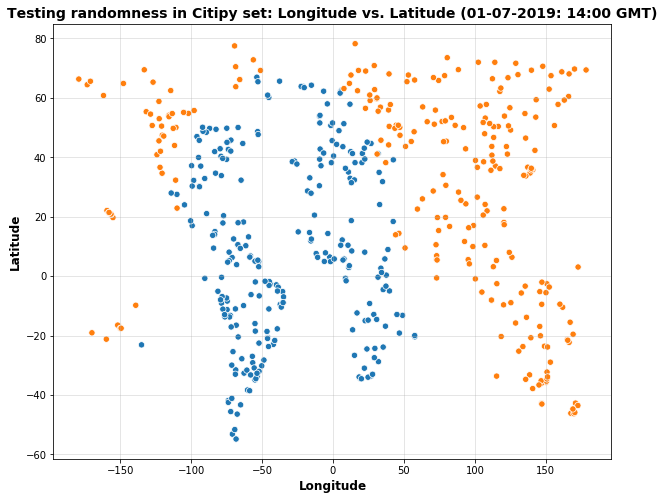

In [6]:
sbn.scatterplot(data=weather_data, x='Lon', y='Lat', hue='Daytime', legend=False, s=40)
fig = plt.gcf()
fig.set_size_inches(10, 8)
fig.ylimit=(-60,45)
fig.xlimit=(-65,85)
plt.grid(alpha=0.4)
plt.xlabel('Longitude', fontsize=12, fontweight='bold')
plt.ylabel('Latitude', fontsize=12, fontweight='bold')
plt.title(f"Testing randomness in Citipy set: Longitude vs. Latitude ({adate})", fontsize=14, fontweight='bold')
plt.savefig('./graphics/Citipy randomness test')

## Temperature vs. Latitude

- Temperature has an inverse relationship to the absolute value of the latitude
- This demonstrates that temperatures do rise as you near the equator
- There was a different slope to the relationship for temperatures measured during the day and night for one sample but not another.
- P-values are significant in all three measures - combined, daytime and nighttime
- When plotting temperature vs. actual latitude, it is apparent that the Northern Hemisphere is much 
colder than Southern Hemisphere - probably because it\'s winter.


### Fig. 1 Temperature vs. Absolute Latitude using seaborn to highlight day/night

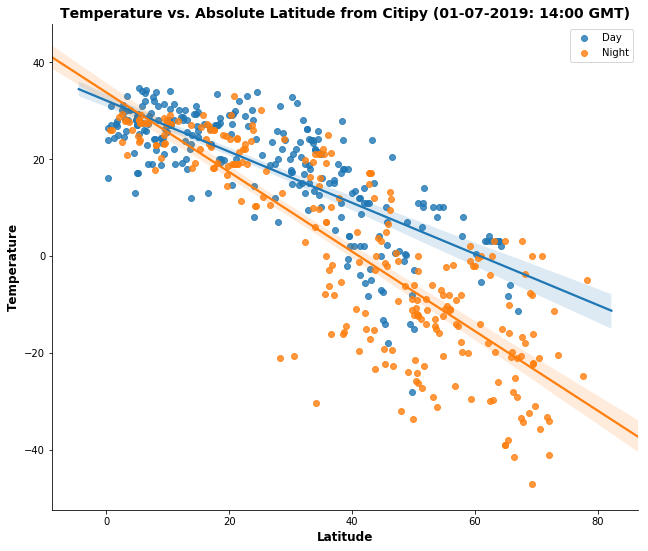

In [8]:
sbn.lmplot(data=weather_data, x='Absolute Latitude', y='Max Temp', hue='Daytime', legend=False)
fig = plt.gcf()
fig.set_size_inches(10, 8)
fig.ylimit=(-60,45)
fig.xlimit=(-65,85)
plt.xlabel('Latitude', fontsize=12, fontweight='bold')
plt.ylabel('Temperature', fontsize=12, fontweight='bold')
plt.title(f"Temperature vs. Absolute Latitude from Citipy ({adate})", fontsize=14, fontweight='bold')
plt.legend(loc='best')
plt.savefig('./graphics/Fig1.png')

In [12]:
# There were no outliers
outliers = weather_data[weather_data['Max Temp'] > weather_data['Max Temp'].mean() + 3 * weather_data['Max Temp'].std()]
outliers

,City,Humidity,Min Temp,Max Temp,Wind Speed,Cloudiness,Date,Country,Sunrise,Sunset,Lat,Lon,Daytime,Date(GMT),Absolute Latitude


In [9]:
# get coeffs of linear fit for the full dataset
w_stats(weather_data['Absolute Latitude'], weather_data['Max Temp'])

'Slope: -0.7611675639161194. Intercept: 34.79229133463255. R: -0.8257587729521499. P: 1.999914912238503e-131. SE: 0.022799355135761066'

In [10]:
# get coeffs of linear fit for cities that were in nighttime when data was collected
night_df = weather_data.loc[weather_data.Daytime=='Night',:]
w_stats(night_df['Absolute Latitude'], night_df['Max Temp'])

'Slope: -0.8212563491060049. Intercept: 33.73394444644981. R: -0.8375107844554487. P: 2.0765630001537552e-69. SE: 0.03342327403461501'

In [11]:
# get coeffs of linear fit for cities that were in daytime when data was collected
day_df = weather_data.loc[weather_data.Daytime=='Day',:]
w_stats(day_df['Absolute Latitude'], day_df['Max Temp'])

'Slope: -0.5275382145582684. Intercept: 32.04071006739009. R: -0.7696209757336896. P: 8.973754451904773e-53. SE: 0.027090584274665392'

### Fig. 2a. Temperature vs. Absolute Latitude using Matplotlib

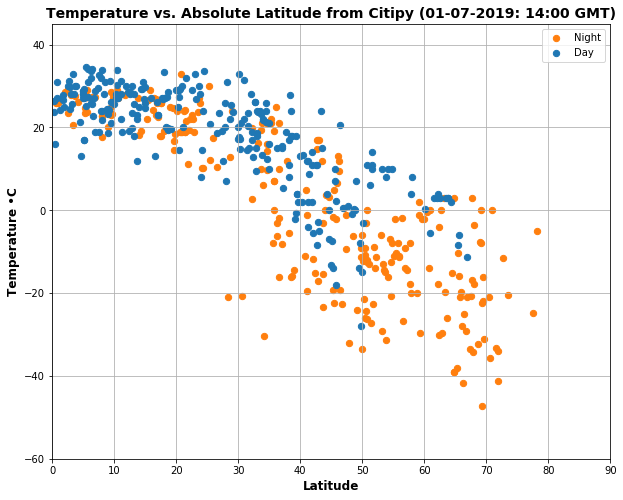

In [13]:
# Duplicating plot without Seaborn since instructions called for Matplotlib only

fig, ax = plt.subplots(figsize=(10,8), subplot_kw={'ylim':(-60,45), 'xlim':(0,90)})
night_df.plot(ax=ax, kind="scatter", x='Absolute Latitude', y='Max Temp', s=40, color="tab:orange", edgecolor='tab:orange', label='Night')
day_df.plot(ax=ax, kind="scatter", grid=True, x='Absolute Latitude', y='Max Temp', s=40, color="tab:blue", edgecolors="tab:blue", label='Day')

plt.xlabel('Latitude', fontsize=12, fontweight='bold')
plt.ylabel('Temperature •C', fontsize=12, fontweight='bold')
plt.title(f"Temperature vs. Absolute Latitude from Citipy ({adate})", fontsize=14, fontweight='bold')
plt.legend(loc='best')
plt.savefig('./graphics/Fig2a.png')

### Fig. 2b - Temperature vs. Real Latitude

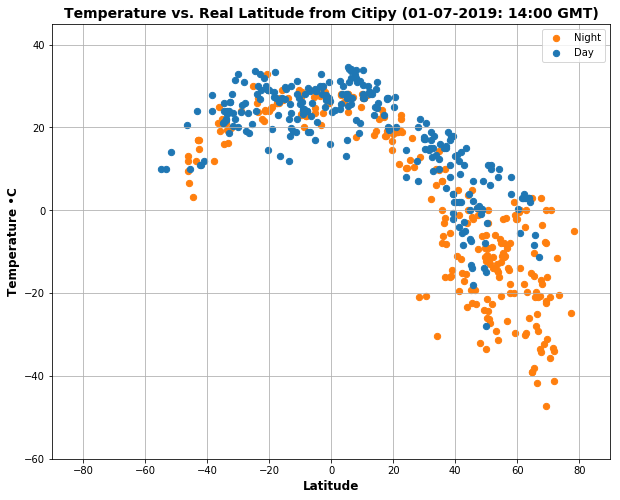

In [14]:
# Duplicating plot without absolute Latitude

fig, ax = plt.subplots(figsize=(10,8), subplot_kw={'ylim':(-60,45), 'xlim':(-90,90)})
night_df.plot(ax=ax, kind="scatter", x='Lat', y='Max Temp', s=40, color="tab:orange", edgecolor='tab:orange', label='Night')
day_df.plot(ax=ax, kind="scatter", grid=True, x='Lat', y='Max Temp', s=40, color="tab:blue", edgecolors="tab:blue", label='Day')

plt.xlabel('Latitude', fontsize=12, fontweight='bold')
plt.ylabel('Temperature •C', fontsize=12, fontweight='bold')
plt.title(f"Temperature vs. Real Latitude from Citipy ({adate})", fontsize=14, fontweight='bold')
plt.legend(loc='best')
plt.savefig('./graphics/Fig2b.png')

## Humidity vs. Latitude

- The dataset had one outlier where humidity was greater than 100 percent, so that was removed
- The relationship between humidity and latitude was not significant for the whole dataset.
- However, there was a significant increase in humidity in cities nearer to the equator at night (P=1.95e-08).
- That increase was not reflected in subsequent runs and could have been the result of a specific weather pattern.
- There was no significant difference in humidity in cities based on latitude during the day.
- When looking at humidity vs. lat/long coordinates, one can clearly see arid conditions in Northern Africa and Siberia.


In [15]:
outliers = weather_data[weather_data['Humidity'] > weather_data['Humidity'].mean() + 3 * weather_data['Humidity'].std()]
outliers

,City,Humidity,Min Temp,Max Temp,Wind Speed,Cloudiness,Date,Country,Sunrise,Sunset,Lat,Lon,Daytime,Date(GMT),Absolute Latitude
478,Paita,290,17.0,17.0,5.1,75,1546869600,PE,1546859931,1546904581,-5.09,-81.11,Day,01-07-2019: 14:00,5.09


In [16]:
#Removing one outlier that had a humidity of 300% for the seaborn plot
weather_data_f = weather_data[np.abs(weather_data.Humidity-weather_data.Humidity.mean()) <= (3*weather_data.Humidity.std())]

### Fig 3. Humidity vs. Absolute Latitude using seaborn¶

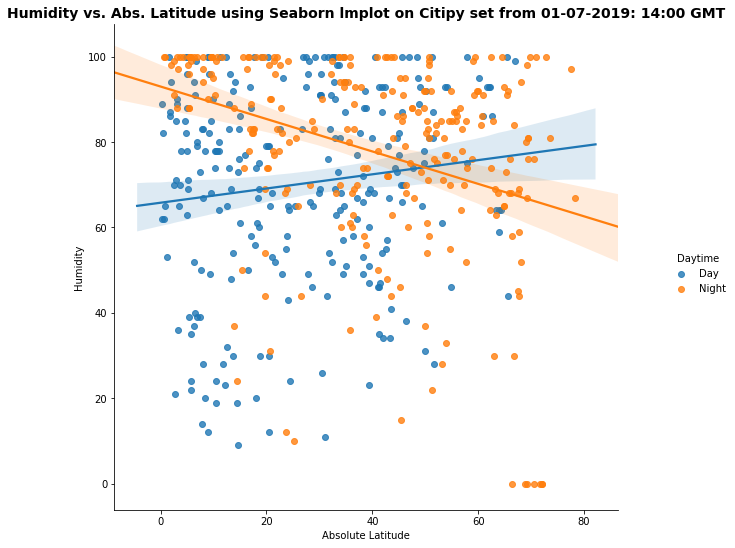

In [17]:
# Looking at the seaborn plot you can see a trend in the nighttime samples.

sbn.lmplot(data=weather_data_f, x='Absolute Latitude', y='Humidity', hue='Daytime', legend=True)
fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.title(f"Humidity vs. Abs. Latitude using Seaborn lmplot on Citipy set from {adate}", fontsize=14, fontweight='bold')

plt.savefig('./graphics/Fig3.png')

### Fig. 4. Humidity mapped by Longitude/Latitude coordinates in seaborn

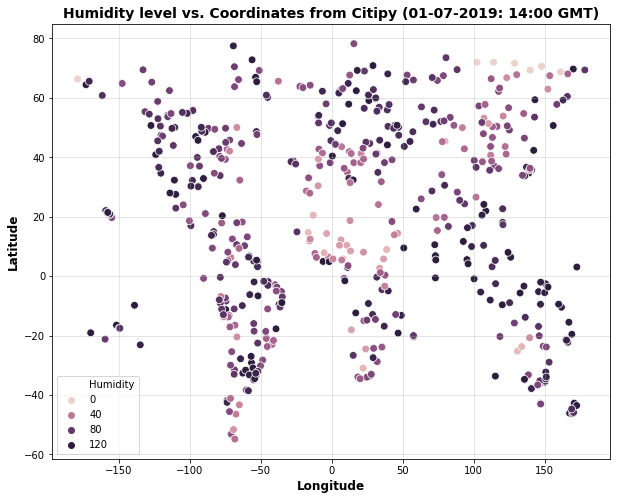

In [18]:
# Plotting humidity on a longitude/latitude grid.

sbn.scatterplot(data=weather_data_f, x='Lon', y='Lat', hue='Humidity', s=60)
fig = plt.gcf()
fig.set_size_inches(10, 8)
fig.ylimit=(-60,45)
fig.xlimit=(-65,85)

plt.grid(alpha=0.4)
plt.xlabel('Longitude', fontsize=12, fontweight='bold')
plt.ylabel('Latitude', fontsize=12, fontweight='bold')

plt.legend(loc='best')
plt.title(f"Humidity level vs. Coordinates from Citipy ({adate})", fontsize=14, fontweight='bold')
# plt.legend(loc='best')
plt.savefig('./graphics/Fig4.png')

In [19]:
#Removing one outlier that had a humidity of 300% for the matplotlib plot
day_df = day_df[np.abs(day_df.Humidity-day_df.Humidity.mean()) <= (3*day_df.Humidity.std())]

### Fig. 5 Humidity vs. Absolute Latitude in Matplotlib

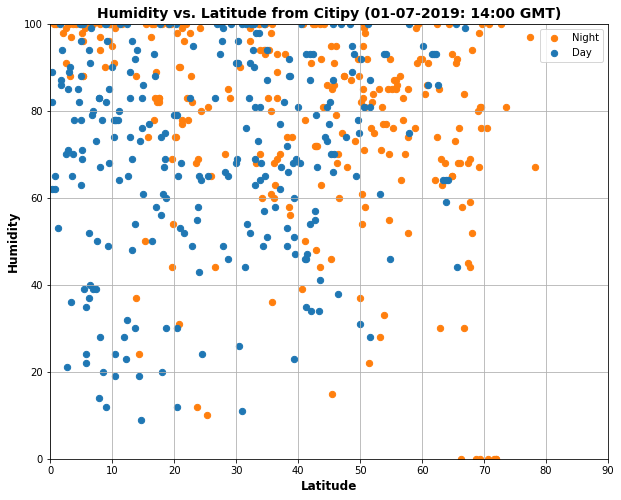

In [20]:
# Duplicating in Matplotlib because instructions said to only use this.

fig, ax = plt.subplots(figsize=(10,8), subplot_kw={'ylim':(0,100), 'xlim':(0,90)})
night_df.plot(ax=ax, kind="scatter", x='Absolute Latitude', y='Humidity', s=40, color="tab:orange", edgecolor='tab:orange', label='Night')
day_df.plot(ax=ax, kind="scatter", grid=True, x='Absolute Latitude', y='Humidity', s=40, color="tab:blue", edgecolors="tab:blue", label='Day')

plt.xlabel('Latitude', fontsize=12, fontweight='bold')
plt.ylabel('Humidity', fontsize=12, fontweight='bold')
plt.title(f"Humidity vs. Latitude from Citipy ({adate})", fontsize=14, fontweight='bold')
plt.legend(loc='best')

# plt.legend(loc='best')
plt.savefig('./graphics/Fig5.png')

### Cloudiness vs. Latitude
- There were no outliers in Cloudiness in the dataset
- We could find no apparent relationship between cloudiness and latitude through scatter plot (Fig. 6a).
- A plot of cloudiness vs. coordinates shows the clusters of cloudy regions based on latitude and longitude (Fig. 6b).
- At the time of data collection, it was cloudy in portions of Canada, South America, Northern Europe
- At the time of data collection it was largely clear across the equator.

In [21]:
# There were no outliers
outliers = weather_data[weather_data['Cloudiness'] > weather_data['Cloudiness'].mean() + 3 * weather_data['Cloudiness'].std()]
outliers

,City,Humidity,Min Temp,Max Temp,Wind Speed,Cloudiness,Date,Country,Sunrise,Sunset,Lat,Lon,Daytime,Date(GMT),Absolute Latitude


### Fig 6. Cloudiness vs. Latitude night/day by coordinates

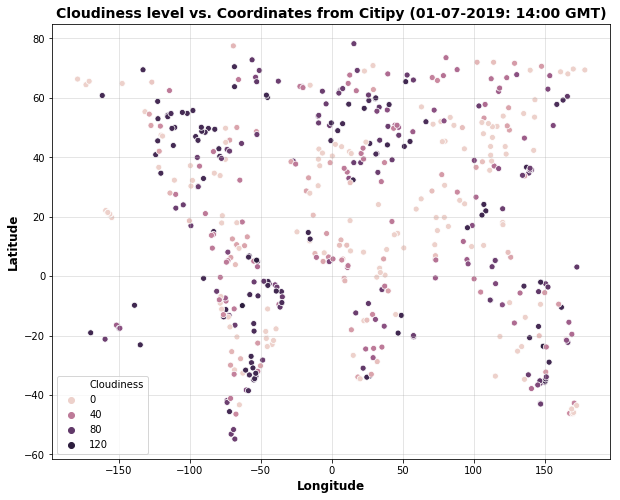

In [25]:
# Plotting cloudiness vs. coordinates in seaborn
sbn.scatterplot(data=weather_data, x='Lon', y='Lat', hue='Cloudiness')
fig = plt.gcf()
fig.set_size_inches(10, 8)
fig.ylimit=(-60,45)
fig.xlimit=(-65,85)

plt.grid(alpha=0.4)
plt.xlabel('Longitude', fontsize=12, fontweight='bold')
plt.ylabel('Latitude', fontsize=12, fontweight='bold')

plt.legend(loc='best')
plt.title(f"Cloudiness level vs. Coordinates from Citipy ({adate})", fontsize=14, fontweight='bold')
# plt.legend(loc='best')
plt.savefig('./graphics/Fig6.png')

### Latitude vs. Wind Speed Plot
- There was no direct relationship between latitude or longitude and wind
- There were several outliers
- There was a cluster of windiness in Northern Europe and South America.

In [26]:
# There were several outliers
outliers = weather_data[weather_data['Wind Speed'] > weather_data['Wind Speed'].mean() + 3 * weather_data['Wind Speed'].std()]
outliers

,City,Humidity,Min Temp,Max Temp,Wind Speed,Cloudiness,Date,Country,Sunrise,Sunset,Lat,Lon,Daytime,Date(GMT),Absolute Latitude
42,Nanortalik,95,0.33,0.33,16.51,92,1546872337,GL,1546862371,1546884943,60.14,-45.24,Day,01-07-2019: 14:45,60.14
55,Provideniya,100,-15.15,-15.15,13.91,0,1546872211,RU,1546895936,1546912835,64.42,-173.23,Night,01-07-2019: 14:43,64.42
295,San Carlos de Bariloche,46,12.00,12.00,13.40,40,1546869600,AR,1546852950,1546906837,-41.13,-71.31,Day,01-07-2019: 14:00,41.13
319,Ossora,91,-1.15,-1.15,17.06,88,1546872784,RU,1546811956,1546835339,59.24,163.07,Night,01-07-2019: 14:53,59.24
447,Getulio Vargas,94,26.23,26.23,13.96,92,1546872982,UY,1546850104,1546901163,-32.68,-53.55,Day,01-07-2019: 14:56,32.68
470,Golspie,75,8.00,8.00,14.40,75,1546870800,GB,1546851440,1546876062,57.97,-3.98,Day,01-07-2019: 14:20,57.97
475,Klaksvik,93,4.00,4.00,25.20,76,1546870800,FO,1546854326,1546874432,62.23,-6.59,Day,01-07-2019: 14:20,62.23


In [27]:
#Removing one outlier that had a humidity of 300% for the seaborn plot
weather_data_w = weather_data[np.abs(weather_data['Wind Speed']-weather_data['Wind Speed'].mean()) <= (3*weather_data['Wind Speed'].std())]
len(weather_data_w)

515

In [28]:
# Remake night/day dataframes without outliers
night_dfw = weather_data_w.loc[weather_data_w.Daytime=='Night',:]
day_dfw = weather_data_w.loc[weather_data_w.Daytime=='Day',:]

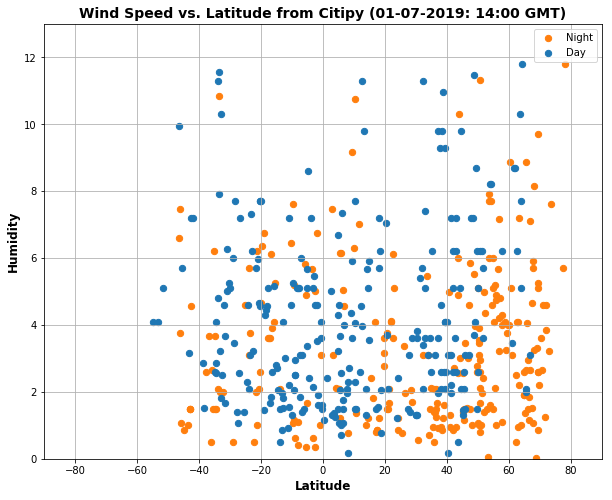

In [29]:
# Duplicating in Matplotlib because instructions said to only use this.

fig, ax = plt.subplots(figsize=(10,8), subplot_kw={'ylim':(0,13), 'xlim':(-90,90)})
night_dfw.plot(ax=ax, kind="scatter", x='Lat', y='Wind Speed', s=40, color="tab:orange", edgecolor='tab:orange', label='Night')
day_dfw.plot(ax=ax, kind="scatter", grid=True, x='Lat', y='Wind Speed', s=40, color="tab:blue", edgecolors="tab:blue", label='Day')

plt.xlabel('Latitude', fontsize=12, fontweight='bold')
plt.ylabel('Humidity', fontsize=12, fontweight='bold')
plt.title(f"Wind Speed vs. Latitude from Citipy ({adate})", fontsize=14, fontweight='bold')

# fig.legend(loc='best')
plt.savefig('./graphics/Fig7.png')

### Fig. 8. Wind Speed level by Coordinates in seaborn

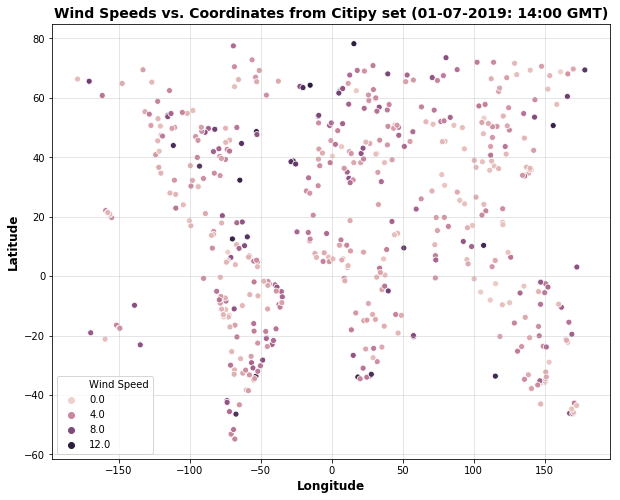

In [30]:
sbn.scatterplot(data=weather_data_w, x='Lon', y='Lat', hue='Wind Speed', legend='brief')
fig = plt.gcf()
fig.set_size_inches(10, 8)
fig.ylimit=(-60,45)
fig.xlimit=(-65,85)
plt.grid(alpha=0.4)
plt.xlabel('Longitude', fontsize=12, fontweight='bold')
plt.ylabel('Latitude', fontsize=12, fontweight='bold')
plt.title(f"Wind Speeds vs. Coordinates from Citipy set ({adate})", fontsize=14, fontweight='bold')
# plt.legend(loc='best')
plt.savefig('./graphics/Fig8.png')

In [31]:
## I TRIED to map this using gmaps heat maps with more code than what is below, but each time I tried I corrupted the Jupyter Notebook.
# Gmaps didn't show anything the graphs above don't.

# # Attempt to map the data of temperature extremes using Gmaps head map
# locations = weather_data[["Lat", "Lon"]]

# # Fill NaN values and convert to float
# temps = weather_data["Wind Speed"]
# fig = gmaps.figure()

# # Create heat layer
# heat_layer = gmaps.heatmap_layer(locations, weights=temps, 
#                                  dissipating=False, max_intensity=10,
#                                  point_radius=1)


# # Add layer
# fig.add_layer(heat_layer)

# # Display figure
# fig